# Watersheds for Supervised Classification

In this notebook we present a few results on using watersheds for supervised classification. We use a variant of the MSF-watershed as cited in [1](https://hal-upec-upem.archives-ouvertes.fr/hal-00622410/document) for supervised classification.


All the relevant implementations are in "utils.py". 

Links:

[1] https://hal-upec-upem.archives-ouvertes.fr/hal-00622410/document


In [14]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
from matplotlib import pyplot as plt
import time

from utils import *

%matplotlib inline


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC


Using TensorFlow backend.


# Visualizing the boundaries

We start with trying to understand the how the boundaries of using watershed as classifier behave? Note that MSF-watershed requires both the train and test data to be presented before training. However, as discussed in the accompanying article, one can use 1-Nearest Neighbor classifier to classify new points and this would result in equivalent labelling! (Thanks to PRIM's MST algorithm)

We use this techinique to visualize the boundaries!!

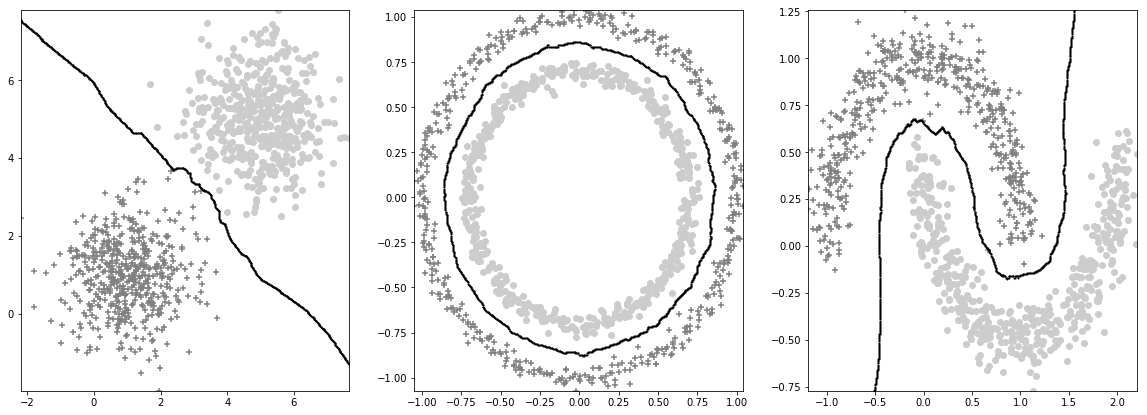

In [12]:
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.neighbors import kneighbors_graph

np.random.seed(10)

size_data = 1000
percent_seeds = 0.1
X, y = make_blobs(size_data, n_features=2, centers=[[1,1], [5,5]], cluster_std=1.0)
graph = kneighbors_graph(X, n_neighbors=20, mode='distance')
seeds = np.zeros(size_data, dtype=np.int32)

for label in np.unique(y):
    ind_label = np.where(y==label)[0]
    ind = np.random.choice(ind_label, size=int(percent_seeds*(ind_label.shape[0])))
    seeds[ind] = label+1
    
y_watershed = watershed_supervised(graph, seeds)

bx, by = plot_boundary(X, y_watershed, resolution=400, n_neighbors=5)
xmin, xmax, ymin, ymax = np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])
color = np.array([x for x in 'bgrcmykw']*10)

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.axis([xmin, xmax, ymin, ymax])
ind = np.where(y_watershed == 1)
plt.scatter(X[ind,0], X[ind,1], marker='+', c='0.5')
ind = np.where(y_watershed == 2)
plt.scatter(X[ind,0], X[ind,1], marker='o', c='0.8')
plt.scatter(bx, by, s=1,c='k')
plt.savefig("./img/example1.eps", dpi=400, cmap=plt.cm.gray)


size_data = 1000
percent_seeds = 0.1
X, y = make_circles(n_samples=size_data, noise=0.03, factor=0.7)
graph = kneighbors_graph(X, n_neighbors=20, mode='distance')
seeds = np.zeros(size_data, dtype=np.int32)

for label in np.unique(y):
    ind_label = np.where(y==label)[0]
    ind = np.random.choice(ind_label, size=int(percent_seeds*(ind_label.shape[0])))
    seeds[ind] = label+1
    
y_watershed = watershed_supervised(graph, seeds)

bx, by = plot_boundary(X, y_watershed, resolution=400, n_neighbors=5)
xmin, xmax, ymin, ymax = np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])
color = np.array([x for x in 'bgrcmykw']*10)

plt.subplot(1,3,2)
plt.axis([xmin, xmax, ymin, ymax])
ind = np.where(y_watershed == 1)
plt.scatter(X[ind,0], X[ind,1], marker='+', c='0.5')
ind = np.where(y_watershed == 2)
plt.scatter(X[ind,0], X[ind,1], marker='o', c='0.8')
plt.scatter(bx, by, s=1,c='k')
plt.savefig("./img/example2.eps", dpi=400, cmap=plt.cm.gray)


size_data = 1000
percent_seeds = 0.1
X, y = make_moons(n_samples=size_data, noise=0.1)
graph = kneighbors_graph(X, n_neighbors=20, mode='distance')
seeds = np.zeros(size_data, dtype=np.int32)

for label in np.unique(y):
    ind_label = np.where(y==label)[0]
    ind = np.random.choice(ind_label, size=int(percent_seeds*(ind_label.shape[0])))
    seeds[ind] = label+1
    
y_watershed = watershed_supervised(graph, seeds)

bx, by = plot_boundary(X, y_watershed, resolution=400, n_neighbors=5)
xmin, xmax, ymin, ymax = np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])
color = np.array([x for x in 'bgrcmykw']*10)

plt.subplot(1,3,3)
plt.axis([xmin, xmax, ymin, ymax])
ind = np.where(y_watershed == 1)
plt.scatter(X[ind,0], X[ind,1], marker='+', c='0.5')
ind = np.where(y_watershed == 2)
plt.scatter(X[ind,0], X[ind,1], marker='o', c='0.8')
plt.scatter(bx, by, s=1,c='k')
plt.savefig("./img/example3.eps", dpi=400, cmap=plt.cm.gray)



# Experiments on High Dimensional Data

The following algorithms in utils.py are used

1. IFT(graph, seeds, alg='SP-SUM')
2. RW(graph, seeds, beta=5., eps=1e-6)
3. powerWatershed_multipleLabels(graph, seeds, bucketing='kmeans', eps=1e-2, k=3, beta=5., eps_weight=1e-6)
4. ensemble_watershed(X, graph, seeds, number_estimators=10, num_features_select=20, percentage_seed_select = 80, gt=None) 
5. watershed_supervised(graph, seeds)
6. SVM (From Sklearn)
7. 1-NearestNeighbor (From Sklearn)
8. RandomForest (From Sklearn)

The SSL datasets are used. The function "get_data(name)" returns the data. 

Possible Parameters:
* IFT : alg='SP-SUM'
* RW : beta in [1,3,5] and eps=[1e-6]
* powerWatershed_multipleLabels : k in [3,5,10], beta in [1,3,5]
* ensemble_watershed: number_estimators=100,  num_features_select in [20,30,50]%
* SVM : C in [0.1, 1., 3.]
* 1-NN (Nothing)
* RandomForest : num_features_select in [20,30,50]%

20% of the data is used for training!

In [ ]:
percent_train = 20
for iIter in range(20):
    with open("./results/results_percentTrain"+str(percent_train)+"Iter"+str(iIter)+".csv", 'w') as f:
        f.write("id,method,dataset,paramters,accuracy,time")
        f.write("\n")
        count = 0
        for dataset in ['SSL1', 'SSL2', 'SSL3','SSL4', 'SSL5','SSL6', 'SSL7']:
            X, y, graph = get_data(dataset)
            y = y.ravel()
            seeds = np.zeros(X.shape[0], dtype=np.int32)
            for label in np.unique(y):
                tmp = np.where(y==label)[0]
                indSelect = np.random.choice(tmp, int(0.01*percent_train*tmp.shape[0]), replace=False)
                seeds[indSelect] = label
                assert label > 0, "GT Label is 0 for some dataset. Please check..."

            # Watershed Supervised
            tic = time.time()
            y_watershed = watershed_supervised(graph,seeds)
            toc = time.time()
            acc_watershed = np.mean(y_watershed[seeds==0]==y[seeds==0])
            f.write(str(count)+","+"watershed"+","+dataset+","+"NA"+","+str(acc_watershed)+","+str(toc-tic))
            f.write("\n")
            count += 1
            print("Watershed for {} done...".format(dataset))

            # IFT-SUM
            tic = time.time()
            y_IFT = IFT(graph, seeds, alg='SP-SUM')
            toc = time.time()
            acc_IFT = np.mean(y_IFT[seeds==0]==y[seeds==0])
            f.write(str(count)+","+"IFT-SUM"+","+dataset+","+"NA"+","+str(acc_IFT)+","+str(toc-tic))
            f.write("\n")
            count += 1
            print("IFT-SUM for {} done...".format(dataset))

            # RW
            for beta in [1., 3., 5.]:
                tic = time.time()
                y_RW = RW(graph, seeds, beta=beta, eps=1e-6)
                toc = time.time()
                acc_RW = np.mean(y_RW[seeds==0]==y[seeds==0])
                f.write(str(count)+","+"RW"+","+dataset+","+"beta="+str(beta)+","+str(acc_RW)+","+str(toc-tic))
                f.write("\n")
                count += 1
                print("RW for {} with param beta={} done...".format(dataset, beta))


            # Power Watershed
            for beta in [1., 3., 5.]:
                for k in [3,5,10]:
                    tic = time.time()
                    y_PW = powerWatershed_multipleLabels(graph, seeds, bucketing='kmeans', eps=1e-2, k=k, beta=beta, eps_weight=1e-6)
                    toc = time.time()
                    acc_PW = np.mean(y_PW[seeds==0]==y[seeds==0])
                    f.write(str(count)+","+"PW"+","+dataset+","+"beta="+str(beta)+":k="+str(k)+","+str(acc_RW)+","+str(toc-tic))
                    f.write("\n")
                    count += 1
                    print("PW for {} with param beta={} k={} done...".format(dataset, beta, k))


            # SVM
            for C in [0.1, 1., 3.]:
                clf = SVC(C=C, gamma='auto')
                tic = time.time()
                clf.fit(X[seeds>0],y[seeds>0])
                y_SVM = clf.predict(X)
                toc = time.time()
                acc_SVM = np.mean(y_SVM[seeds==0]==y[seeds==0])
                f.write(str(count)+","+"SVM"+","+dataset+","+"C="+str(C)+","+str(acc_SVM)+","+str(toc-tic))
                f.write("\n")
                count += 1
                print("SVM for {} with param C={} done...".format(dataset, C))

            # 1-NN
            clf = KNN(n_neighbors=1)
            tic = time.time()
            clf.fit(X[seeds>0],y[seeds>0])
            y_1NN = clf.predict(X)
            toc = time.time()
            acc_1NN = np.mean(y_1NN[seeds==0]==y[seeds==0])
            f.write(str(count)+","+"1NN"+","+dataset+","+"NA"+","+str(acc_1NN)+","+str(toc-tic))
            f.write("\n")
            count += 1
            print("1NN for {} done...".format(dataset))


            # Random Forest
            for depth in range(3,21):
                clf = RFC(n_estimators=100, max_depth=depth)
                tic = time.time()
                clf.fit(X[seeds>0],y[seeds>0])
                y_RFC = clf.predict(X)
                toc = time.time()
                acc_RFC = np.mean(y_RFC[seeds==0]==y[seeds==0])
                f.write(str(count)+","+"RFC"+","+dataset+","+"max_depth="+str(depth)+","+str(acc_RFC)+","+str(toc-tic))
                f.write("\n")
                print("RFC for {}  done...".format(dataset))
                count += 1

            # Ensemble Watersheds
            for num_features in [20,30,50]:
                tic = time.time()
                y_ensembleWatershed, _ = ensemble_watershed(X, graph, seeds, number_estimators=100, num_features_select=num_features, percentage_seed_select = 80, gt=None) 
                toc = time.time()
                acc_ensembleWatershed = np.mean(y_ensembleWatershed[seeds==0]==y[seeds==0])
                f.write(str(count)+","+"Ensemblewatershed"+","+dataset+","+"num_features="+str(num_features)+","+str(acc_ensembleWatershed)+","+str(toc-tic))
                f.write("\n")
                count += 1
                print("Ensemble Watersheds for {} with param num_features={} done...".format(dataset, num_features))

            
            
            
            


In [22]:
import numpy as np
import pandas as pd
acc_summary = {}
for method in ["watershed", "IFT-SUM", "RW", "PW", "SVM", "1NN", "RFC", "Ensemblewatershed"]:
        for dataset in ['SSL1', 'SSL2', 'SSL3','SSL4', 'SSL5','SSL6', 'SSL7']:
            acc_summary[method+dataset] = []

for iIter in range(20):
    data = pd.read_csv("./results/results_percentTrain20"+"Iter"+str(iIter)+".csv")
    for method in ["watershed", "IFT-SUM", "RW", "PW", "SVM", "1NN", "RFC", "Ensemblewatershed"]:
        for dataset in ['SSL1', 'SSL2', 'SSL3','SSL4', 'SSL5','SSL6', 'SSL7']:
            ind = np.logical_and(data['method']==method, data['dataset']==dataset)
            acc = np.max(data[ind]['accuracy'])
            acc_summary[method+dataset].append(acc)

l = ["Method Digit1 USPS COIL(binary) BCI g241c COIL g241n".split()]
for method in ["watershed", "IFT-SUM", "RW", "PW", "SVM", "1NN", "RFC", "Ensemblewatershed"]:
    tmp = [method]
    for dataset in ['SSL1', 'SSL2', 'SSL3','SSL4', 'SSL5','SSL6', 'SSL7']:
        z = acc_summary[method+dataset]
        tmp.append("{:.2f} + {:.2f}".format(np.mean(z)*100, np.std(z)*100))
       
    l.append(tmp)
display(HTML(tabulate.tabulate(l, tablefmt='html')))          

Method,Digit1,USPS,COIL(binary),BCI,g241c,COIL,g241n
watershed,96.26 + 1.06,95.70 + 0.80,99.76 + 0.24,51.14 + 2.98,55.03 + 1.88,95.59 + 0.83,56.16 + 1.82
IFT-SUM,96.55 + 0.61,95.33 + 0.68,96.18 + 1.18,53.73 + 2.09,61.40 + 1.41,89.77 + 1.41,64.75 + 1.01
RW,98.12 + 0.57,91.70 + 1.17,95.86 + 1.17,53.45 + 2.58,70.27 + 5.18,91.42 + 0.95,76.32 + 3.47
PW,97.94 + 0.54,89.66 + 1.10,95.86 + 1.17,51.98 + 2.46,70.27 + 5.18,91.42 + 0.95,76.32 + 3.47
SVM,93.10 + 0.97,90.60 + 0.86,56.25 + 0.65,59.44 + 3.67,84.38 + 0.97,22.23 + 1.18,84.79 + 1.29
1NN,96.55 + 0.61,95.33 + 0.68,96.18 + 1.18,53.73 + 2.09,61.40 + 1.41,89.77 + 1.41,64.78 + 1.01
RFC,95.99 + 0.56,88.53 + 0.70,92.63 + 1.17,58.89 + 2.41,75.92 + 0.60,91.09 + 1.32,73.45 + 1.00
Ensemblewatershed,98.00 + 0.52,92.69 + 1.25,99.92 + 0.16,52.23 + 2.20,65.20 + 3.27,94.88 + 0.76,68.39 + 2.62
